In [16]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import pandapower as pp 
import math


import matplotlib.gridspec as gridscpec


pd.set_option('display.float_format', lambda x:'{:.4f}'.format(x))

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(
    {
        'font.size':10,
        "text.usetex": False,
        "font.family": "serif",
        "font.sans-serif": ['Computer Modern'],
    }
)


I_max_kA = 1 
f = 50 

net = pp.create_empty_network()
bus1 = pp.create_bus(net, vn_kv=500, name="Barra 1")
bus2 = pp.create_bus(net, vn_kv=500, name="Barra 2")

pp.create_line_from_parameters(net ,from_bus=bus1, to_bus=bus2, length_km=500, r_ohm_per_km=0.02, x_ohm_per_km=0.115, c_nf_per_km=19.1, max_i_ka=1, nombre = 'L1', parallel=1)

pp.create_load_from_cosphi(net, bus2, sn_mva=1200, cos_phi=0.9, mode='underexcited')

pp.create_ext_grid(net, bus1, vm_pu=1.0, name="Barra Slack")

pp.runpp(net)




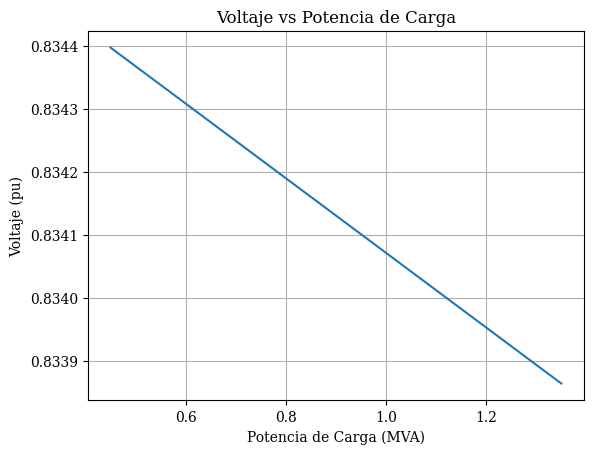

In [17]:
# Define el rango de potencia de carga
rango_potencia = [0.5, 1.5]

# Define los valores de potencia de carga
valores_potencia = [factor_potencia * potencia for potencia in rango_potencia]

# Inicializa listas para almacenar los valores de voltaje
valores_voltaje = []

# Itera sobre los valores de potencia de carga
for potencia_carga in valores_potencia:
    # Establece la potencia de carga
    pp.create_load_from_cosphi(net, bus2, sn_mva=potencia_carga, cos_phi=factor_potencia, mode='underexcited')
    
    # Ejecuta el cálculo de flujo de potencia
    pp.runpp(net)
    
    # Obtiene el valor de voltaje en bus2
    valor_voltaje = net.res_bus.loc[bus2, 'vm_pu']
    
    # Agrega el valor de voltaje a la lista
    valores_voltaje.append(valor_voltaje)

# Grafica los valores de voltaje
plt.plot(valores_potencia, valores_voltaje)
plt.xlabel('Potencia de Carga (MVA)')
plt.ylabel('Voltaje (pu)')
plt.title('Voltaje vs Potencia de Carga')
plt.grid(True)
plt.show()



